In [7]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Try preprocessing on different images

#### Read and convert to gray scale

In [37]:
# Otsu's thresholding after Gaussian filtering
imgUnchanged1 = cv.imread('/home/becode/AI/Data/Skyebase/OpenSource/Positive/00097.jpg',-1) 
grayed1 = cv.cvtColor(imgUnchanged1, cv.COLOR_BGR2GRAY)

imgUnchanged2 = cv.imread('/home/becode/AI/Data/Skyebase/OpenSource/Positive/12868_1.jpg',-1) 
grayed2 = cv.cvtColor(imgUnchanged2, cv.COLOR_BGR2GRAY)

imgUnchanged3 = cv.imread('/home/becode/AI/Data/Skyebase/OpenSource/Positive/19334_1.jpg',-1) 
grayed3 = cv.cvtColor(imgUnchanged3, cv.COLOR_BGR2GRAY)
                      
grayed = [grayed1, grayed2, grayed3]

#### Guassian filter

AttributeError: 'AxesImage' object has no attribute 'set_title'

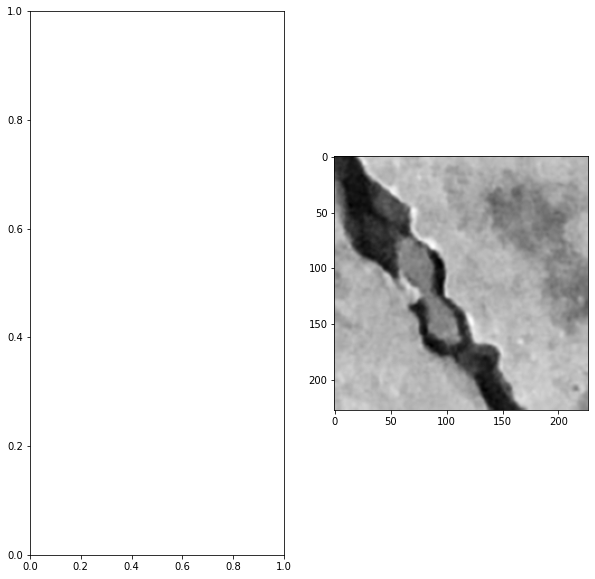

In [18]:
# Guassian blur followed by binary treshold => too high a kernel size might mean I miss finer cracks 
# but gives a smoother crack section
for i, item in enumerate(grayed):
    #print(i, item)
    blur = cv.GaussianBlur(grayed[i],(5,5),0) # kernelsize tuple must be odd and positive
    blur2 = cv.GaussianBlur(grayed[i],(21,21),0) # kernelsize tuple must be odd and positive

    ### USE AXES for this !!!!
    
    #plt.figure(figsize=(10,10))
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,10))
    ax1 = plt.imshow(blur,cmap = 'gray')
    ax1.set_title('Gaussian blur Image')
    plt.xticks([])
    plt.yticks([])
    ax2 = plt.imshow(blur2,cmap = 'gray')
    ax2.set_title('Gaussian blur diff tresh Image')
    plt.xticks([])
    plt.yticks([])
plt.show()
"""
    plt.subplot(131),plt.imshow(blur,cmap = 'gray')
    plt.title('Gaussian blur Image', plt.xticks([]), plt.yticks([])
    plt.subplot(132),plt.imshow(blur2,cmap = 'gray')
    plt.title('Gaussian blur diff tresh',plt.xticks([]), plt.yticks([])

    plt.show()
"""

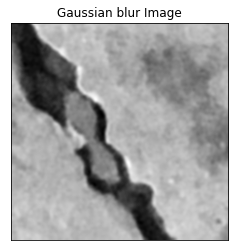

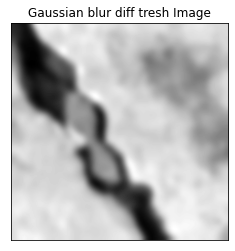

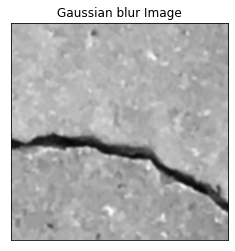

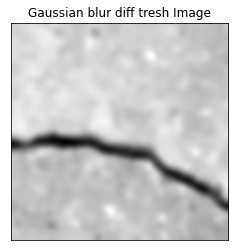

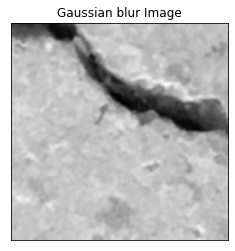

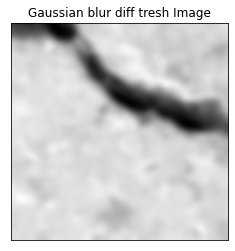

In [41]:
# Guassian blur followed by binary treshold => too high a kernel size might mean I miss finer cracks 
# but gives a smoother crack section
blurs = []
for i, item in enumerate(grayed):
    #print(i, item)
    blur = cv.GaussianBlur(grayed[i],(5,5),0) # kernelsize tuple must be odd and positive
    plt.imshow(blur, cmap = 'gray', interpolation = 'bicubic')
    plt.title('Gaussian blur Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    blur2 = cv.GaussianBlur(grayed[i],(21,21),0) # kernelsize tuple must be odd and positive
    plt.imshow(blur2, cmap = 'gray', interpolation = 'bicubic')
    plt.title('Gaussian blur diff tresh Image'), plt.xticks([]), plt.yticks([])
    plt.show()
    blurs.extend([blur, blur2])
#print(blurs) 
#print(len(blurs))

#### Binary treshold with Otsu 

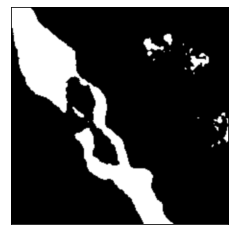

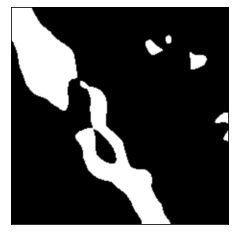

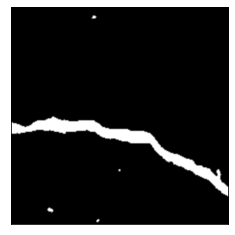

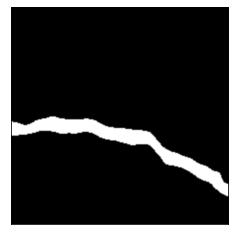

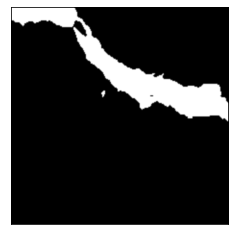

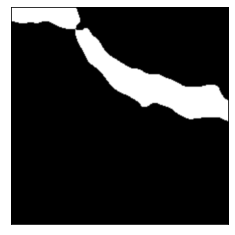

In [43]:
otsu = []
for blur in blurs:

    ret,th = cv.threshold(blur,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
    plt.imshow(th, cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
    plt.show()
    otsu.append(th)


#### Canny Edge (not necessary after clean cracks after Binary Otsu)

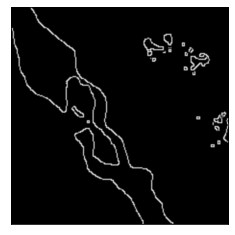

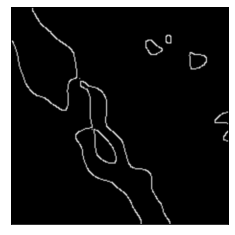

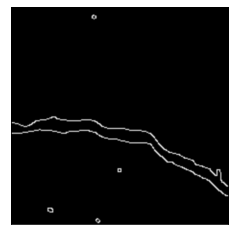

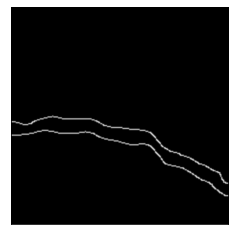

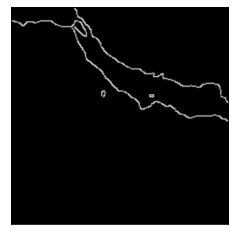

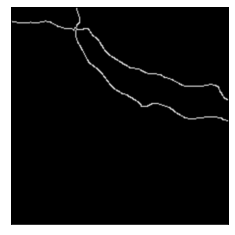

In [45]:
for th in otsu:
    edges = cv.Canny(th,100,200,apertureSize =7)

    plt.imshow(edges,cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
    plt.show()

#### Find contours and draw bounding boxes

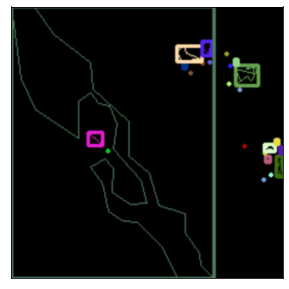

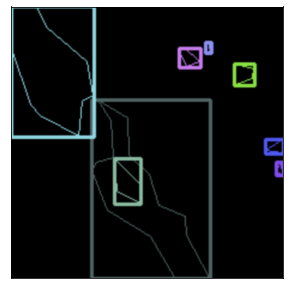

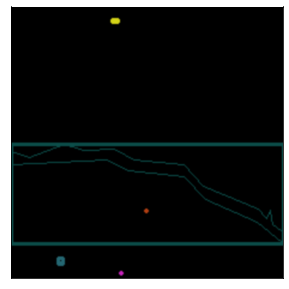

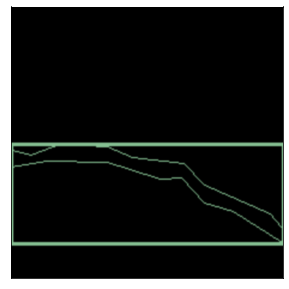

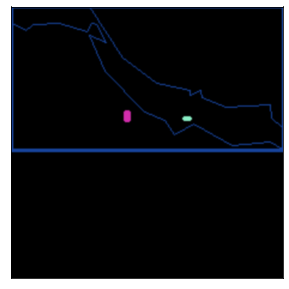

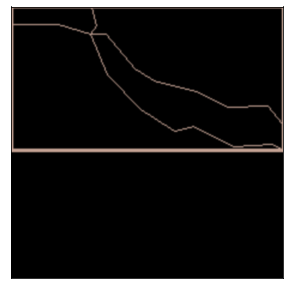

In [46]:
for th in otsu:
    # Find contours  => you can also start from th4 instead of the canny edge image of th4
    contours, _ = cv.findContours(th, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # Approximate contours to polygons + get bounding rects and circles
    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)
    centers = [None]*len(contours)
    radius = [None]*len(contours)
    for i, c in enumerate(contours):
        contours_poly[i] = cv.approxPolyDP(c, 3, True) # cv.approxPolyDP(contour, epsilon, True)
        boundRect[i] = cv.boundingRect(contours_poly[i])
        centers[i], radius[i] = cv.minEnclosingCircle(contours_poly[i])

    drawing = np.zeros((edges.shape[0], edges.shape[1], 3), dtype=np.uint8)

    # Draw polygonal contour + bounding rectangles
    import random
    for i in range(len(contours)):
        color = (random.randint(0,256), random.randint(0,256), random.randint(0,256))
        cv.drawContours(drawing, contours_poly, i, color)
        cv.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
         (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)

    plt.figure(figsize=(5,5))
    plt.imshow(drawing,cmap = 'gray', interpolation = 'bicubic') 
    plt.xticks([]), plt.yticks([])  # hide tick values on X and Y axis
    plt.show()